In [11]:
# Cell 2 - Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


In [12]:
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\student-sleep-project\data\student_sleep_academic_performance.csv")
df.head()

,Student_ID,Age,Gender,Academic_Year,Study_Hours_Per_Week,Sleep_Hours_Per_Night,Sleep_Quality (1-10),Caffeine_Intake (cups/day),Physical_Activity (mins/day),GPA (0-4 scale),Attendance (%),Stress_Level (1-10)
0,S001,24,Male,Third Year,6.4,7.4,6.9,2.0,28.0,3.18,69.0,5.1
1,S002,21,Male,Second Year,11.6,5.6,4.1,2.6,46.0,2.80,65.0,6.2
2,S003,22,Female,Second Year,21.0,7.7,7.6,0.6,10.0,3.29,71.0,4.0
3,S004,24,Male,Third Year,10.1,7.9,8.1,0.4,63.0,3.74,75.0,3.4
4,S005,20,Male,Third Year,12.7,7.9,7.2,1.2,14.0,3.45,74.0,3.4


In [13]:
# Cell 4 - Overview
print("Rows, Columns:", df.shape)
print("\nColumns:")
for c in df.columns:
    print(" -", c)
print("\nDtypes:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Rows, Columns: (500, 12)

Columns:
 - Student_ID
 - Age
 - Gender
 - Academic_Year
 - Study_Hours_Per_Week
 - Sleep_Hours_Per_Night
 - Sleep_Quality (1-10)
 - Caffeine_Intake (cups/day)
 - Physical_Activity (mins/day)
 - GPA (0-4 scale)
 - Attendance (%)
 - Stress_Level (1-10)

Dtypes:
 Student_ID                       object
Age                               int64
Gender                           object
Academic_Year                    object
Study_Hours_Per_Week            float64
Sleep_Hours_Per_Night           float64
Sleep_Quality (1-10)            float64
Caffeine_Intake (cups/day)      float64
Physical_Activity (mins/day)    float64
GPA (0-4 scale)                 float64
Attendance (%)                  float64
Stress_Level (1-10)             float64
dtype: object

Missing values:
 Student_ID                      0
Age                             0
Gender                          0
Academic_Year                   0
Study_Hours_Per_Week            0
Sleep_Hours_Per_Night         

In [14]:
# Cell 5 - Target confirmation
target_col = "GPA (0-4 scale)"
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in dataset columns: {list(df.columns)}")

print(f"Target column detected: {target_col}")
print(df[target_col].describe())


Target column detected: GPA (0-4 scale)
count    500.000000
mean       3.345680
std        0.374331
min        2.190000
25%        3.090000
50%        3.360000
75%        3.602500
max        4.000000
Name: GPA (0-4 scale), dtype: float64


In [15]:
# Cell 6 - Drop ID-like columns
id_like = [c for c in df.columns if "id" in c.lower() or c.lower().startswith("student")]
print("Auto-detected ID-like columns to drop (if present):", id_like)

df_clean = df.drop(columns=[c for c in id_like if c in df.columns])
df_clean.shape


Auto-detected ID-like columns to drop (if present): ['Student_ID']


(500, 11)

In [16]:
# Cell 7 - Numeric and categorical
numeric_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df_clean.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# Ensure target is not listed as feature
if target_col in numeric_cols:
    numeric_cols.remove(target_col)
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

print("Numeric features:", numeric_cols)
print("Categorical features:", categorical_cols)


Numeric features: ['Age', 'Study_Hours_Per_Week', 'Sleep_Hours_Per_Night', 'Sleep_Quality (1-10)', 'Caffeine_Intake (cups/day)', 'Physical_Activity (mins/day)', 'Attendance (%)', 'Stress_Level (1-10)']
Categorical features: ['Gender', 'Academic_Year']


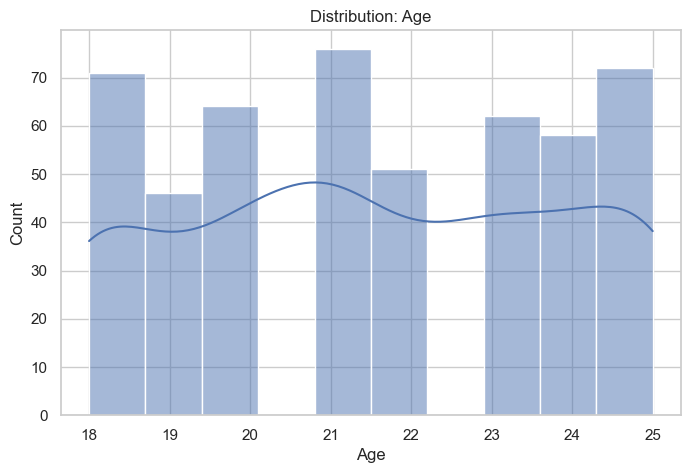

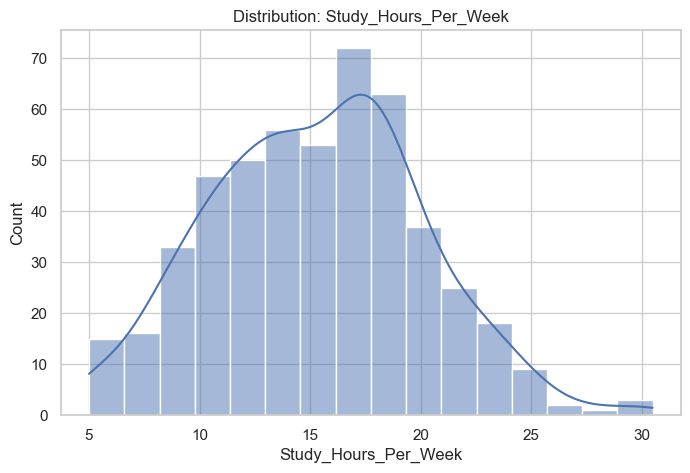

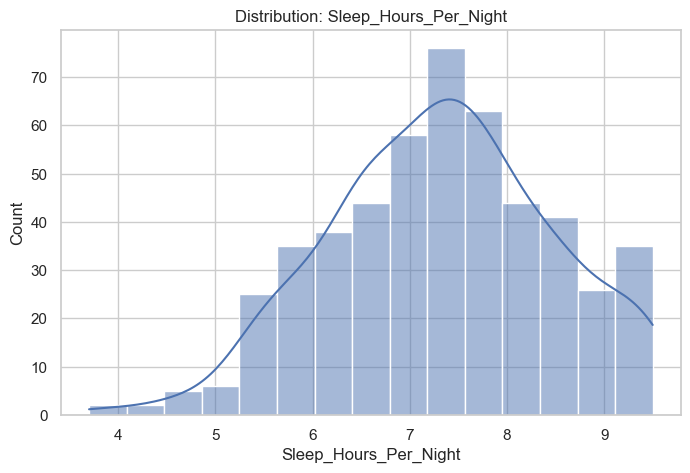

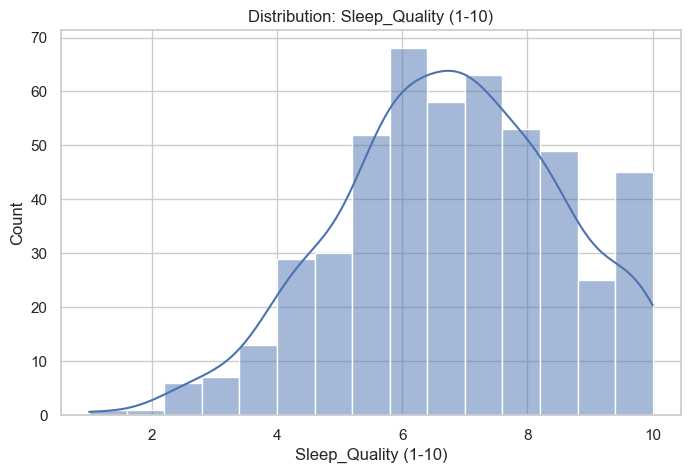

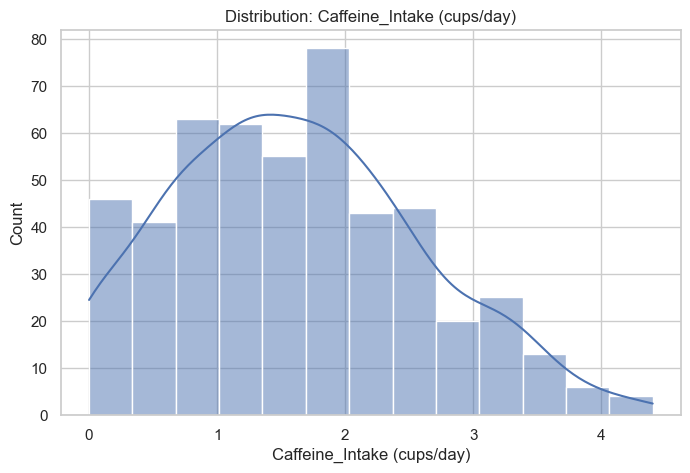

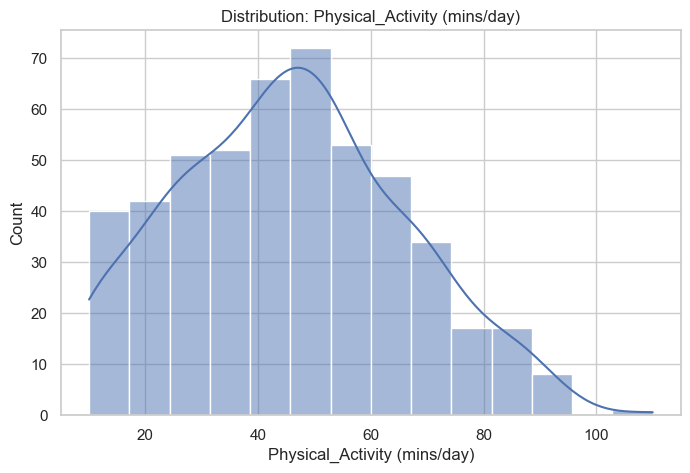

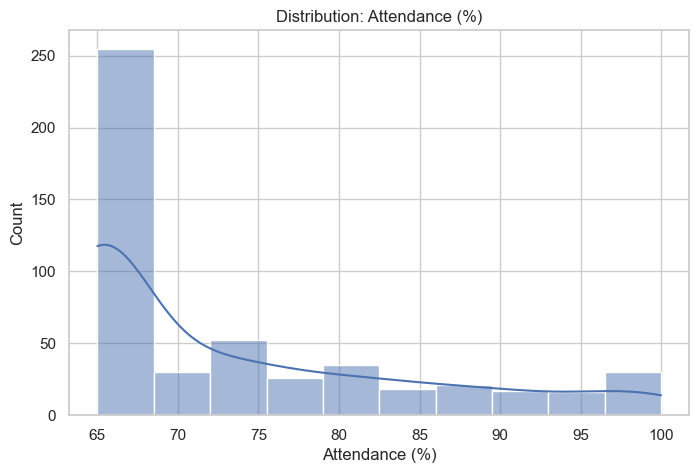

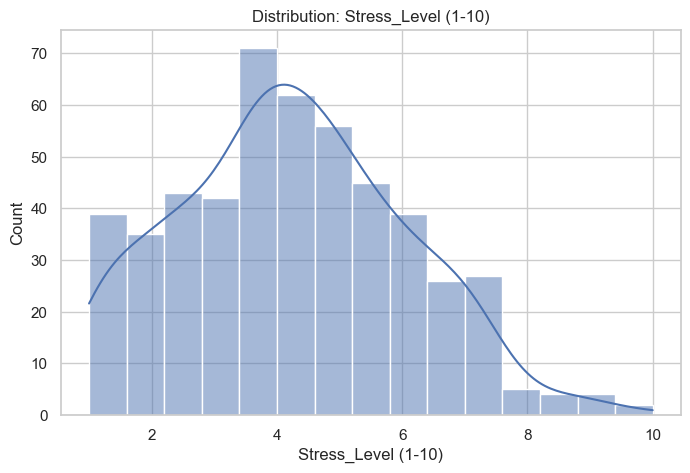

In [17]:
# Cell 8 - Distributions for numeric features
for col in numeric_cols:
    plt.figure()
    sns.histplot(df_clean[col].dropna(), kde=True)
    plt.title(f"Distribution: {col}")
    plt.show()


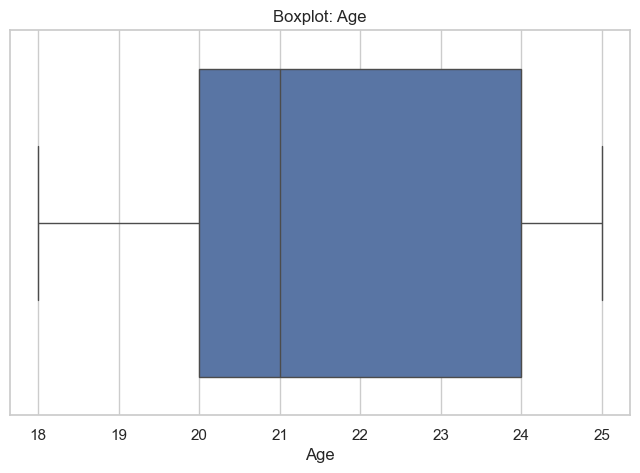

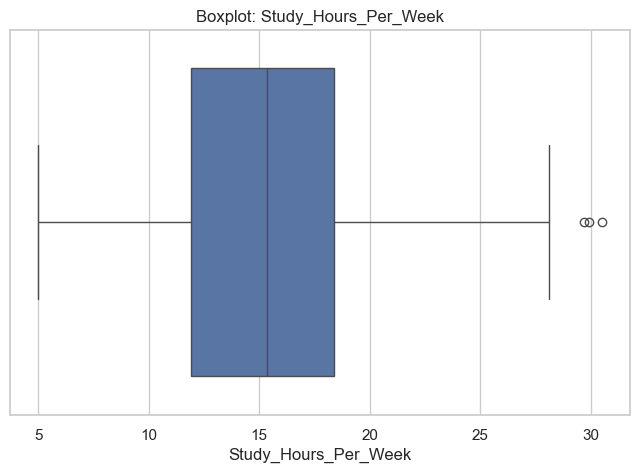

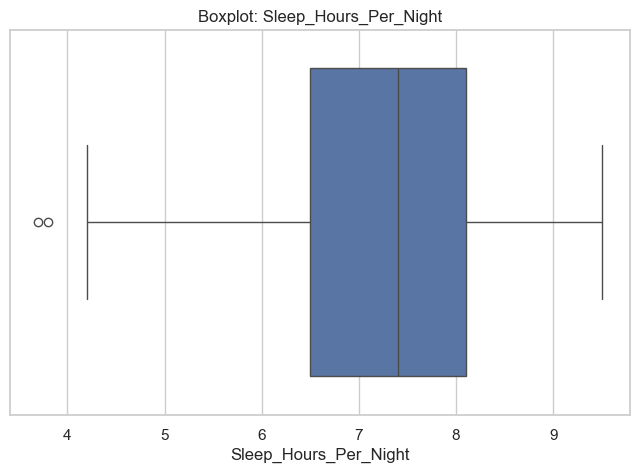

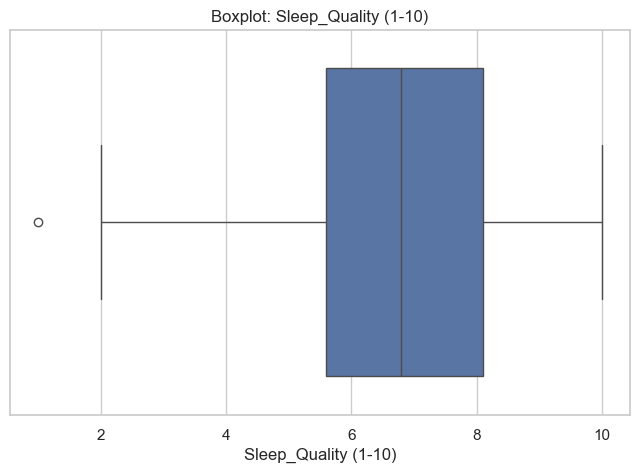

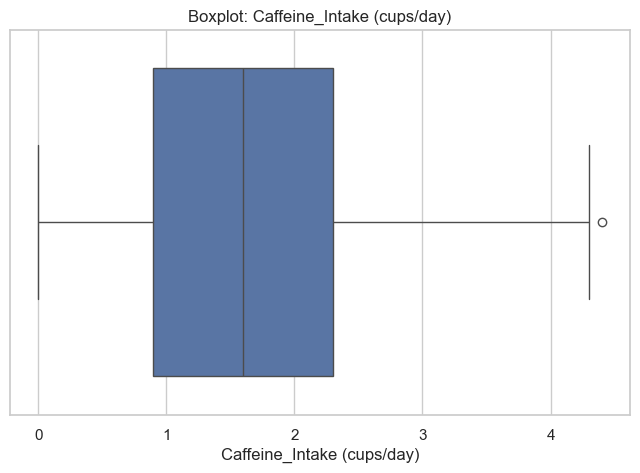

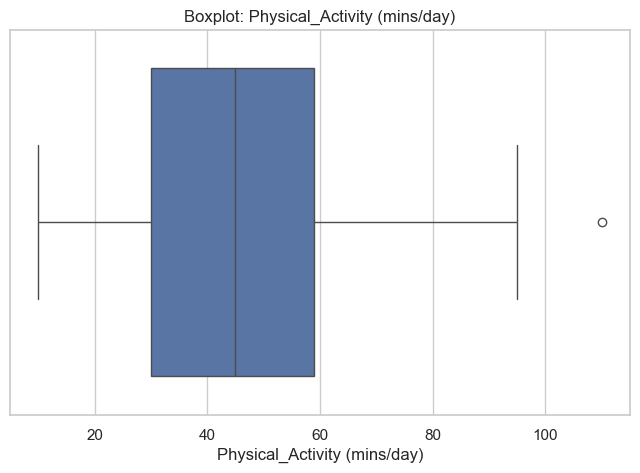

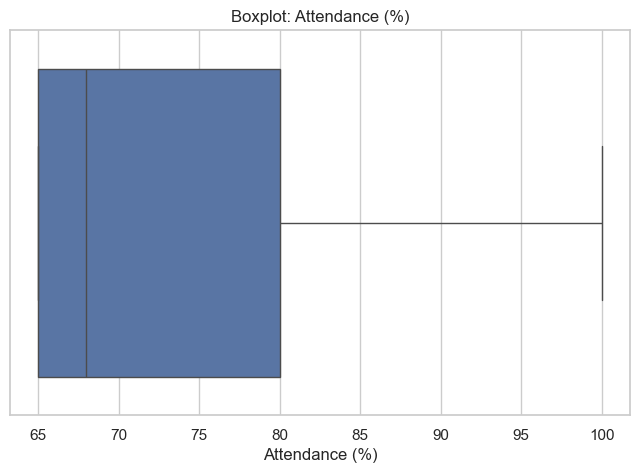

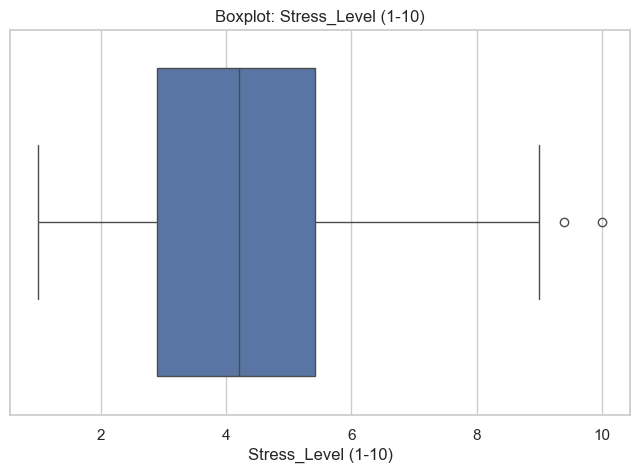

In [18]:
# Cell 9 - Boxplots (outliers)
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df_clean[col].dropna())
    plt.title(f"Boxplot: {col}")
    plt.show()


Value counts for Gender:


Gender
Male      224
Female    224
Other      52
Name: count, dtype: int64

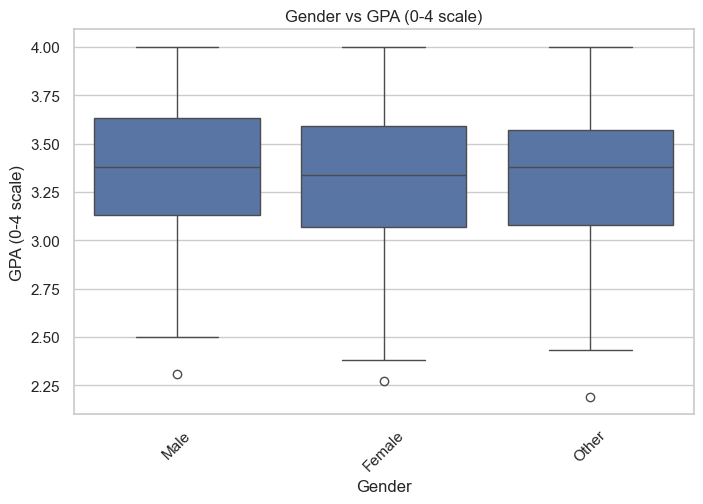

Value counts for Academic_Year:


Academic_Year
Third Year     132
First Year     131
Second Year    127
Fourth Year    110
Name: count, dtype: int64

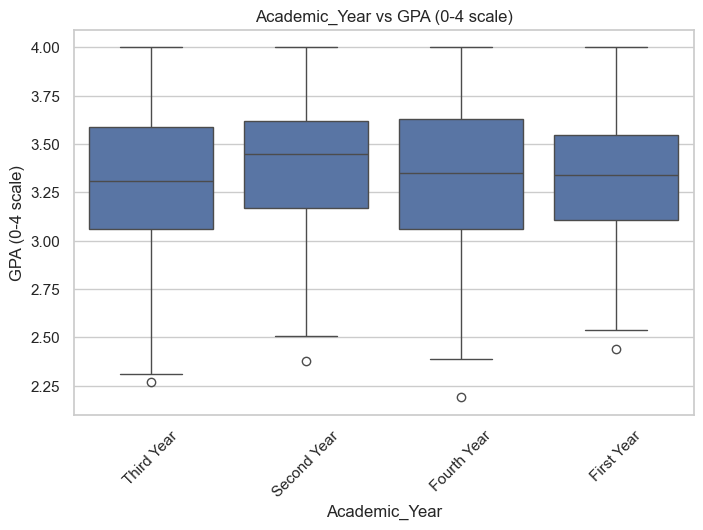

In [19]:
# Cell 10 - Categorical counts and relationship with GPA
for col in categorical_cols:
    print(f"Value counts for {col}:")
    display(df_clean[col].value_counts())
    plt.figure()
    sns.boxplot(x=df_clean[col], y=df_clean[target_col])
    plt.title(f"{col} vs {target_col}")
    plt.xticks(rotation=45)
    plt.show()


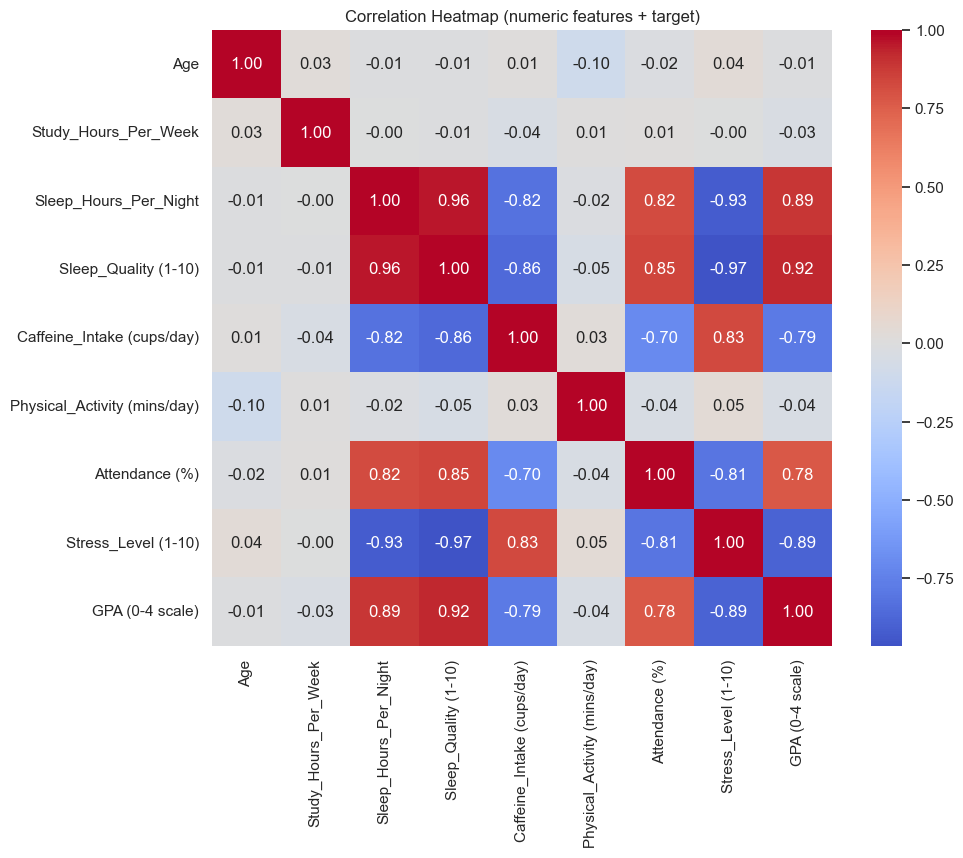

In [20]:
# Cell 11 - Correlation (numeric only)
numeric_df = df_clean[numeric_cols + [target_col]]  # include target for correlation
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (numeric features + target)")
plt.show()


In [22]:
# Cell 13 - Missing value handling preview
missing = df_clean.isnull().sum()
missing = missing[missing > 0]
if missing.empty:
    print("No missing values detected.")
else:
    print("Columns with missing values and counts:")
    print(missing)
    print("\nStrategy used in train.py: numeric -> median imputation; categorical -> constant 'Missing'")


No missing values detected.


In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="Missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_cols),
    ("cat", categorical_pipeline, categorical_cols)
])

preprocessor


,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [25]:
# Cell 15 - Train / Test split
from sklearn.model_selection import train_test_split

X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (400, 10) Test shape: (100, 10)


In [28]:
# Cell 16 - Quick model training (for notebook exploration)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Build full model pipeline
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ))
])

# Train model
model_pipeline.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))   # version-safe RMSE
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 0.11481300000000011
RMSE: 0.14315110862302124
R2 Score: 0.8683290397699857


Sleep_Quality (1-10)            0.820852
Stress_Level (1-10)             0.038046
Sleep_Hours_Per_Night           0.028297
Study_Hours_Per_Week            0.026098
Attendance (%)                  0.022287
Caffeine_Intake (cups/day)      0.017254
Physical_Activity (mins/day)    0.015961
Age                             0.010818
Academic_Year_First Year        0.003533
Gender_Male                     0.003479
Academic_Year_Second Year       0.003423
Gender_Female                   0.003190
Academic_Year_Third Year        0.002923
Academic_Year_Fourth Year       0.002427
Gender_Other                    0.001412
dtype: float64

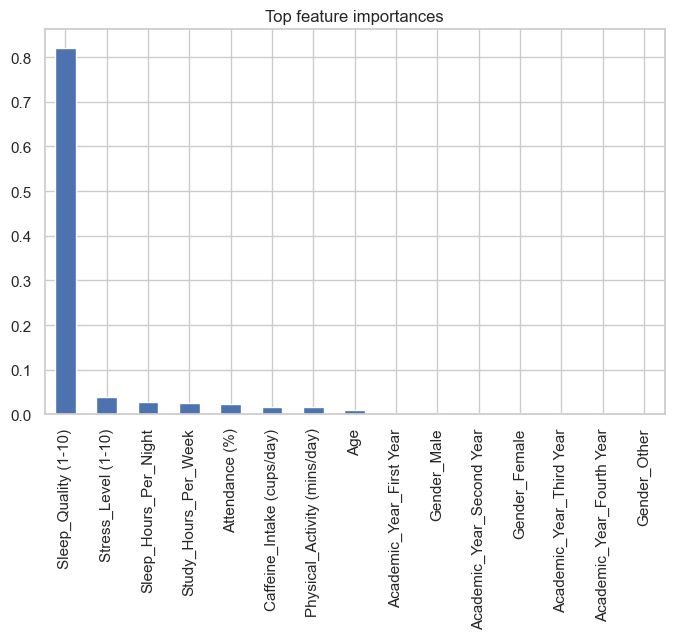

In [29]:
# Cell 17 - Feature importances (approximate)
try:
    # If pipeline stores the regressor under 'regressor'
    reg = model_pipeline.named_steps["regressor"]
    # Get feature names after preprocessing
    num_features = numeric_cols
    cat_features = []
    if categorical_cols:
        ohe = model_pipeline.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"]
        cat_features = list(ohe.get_feature_names_out(categorical_cols))
    feature_names = num_features + cat_features
    importances = reg.feature_importances_
    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)
    display(feat_imp)
    plt.figure()
    feat_imp.plot(kind="bar")
    plt.title("Top feature importances")
    plt.show()
except Exception as e:
    print("Could not compute feature importances automatically:", e)
    print("This is optional and may fail for certain pipeline shapes.")


In [37]:
import os
import joblib

save_dir = r"C:\Users\DELL\OneDrive\Desktop\student-sleep-project\model"
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, "model_notebook.pkl")

joblib.dump(model_pipeline, save_path)

print("Model saved at:", save_path)


Model saved at: C:\Users\DELL\OneDrive\Desktop\student-sleep-project\model\model_notebook.pkl


In [38]:
import os
print(os.listdir(r"C:\Users\DELL\Desktop\student-sleep-project\model"))


['model_notebook.pkl']
